In [1]:
import hdnet
import numpy as np
import scipy.io as spio
import matplotlib.pyplot as plt

In [2]:
Js = spio.loadmat('data/exp2/Jexp2.mat')
Js = Js['Js']
thetas = spio.loadmat('data/exp2/Theta_exp2.mat')
thetas = thetas['Thetas']

## Generating Spike Train from ```First``` Trial, and only first ```15 Neurons```, of the fitted parameters

In [30]:
true_spikes = hdnet.spikes.Spikes(spikes=hdnet.sampling.sample_from_ising_gibbs(J=Js[0,:15,:15], theta=thetas[0,:15], 
num_samples = 10**3, burn_in = 5*10**2, sampling_steps = 10**2))
print(true_spikes._spikes.shape)

(1, 15, 1000)


### Using Method in ```Spikes``` for finding frequencies of codewords in sampled spiketrain

In [5]:
print(true_spikes.get_frequencies())

Counter({'000000000000000': 335, '000010000000000': 172, '000000000000010': 99, '000010000000010': 41, '100000000000000': 36, '001010000000010': 24, '001000000000010': 22, '000000000001010': 20, '000000000001000': 19, '010000000000000': 17, '001010000000000': 17, '000000010000000': 16, '010010000000000': 11, '100000000000010': 11, '000000100000000': 9, '000010000001000': 8, '000000010000010': 8, '010000000000010': 8, '000001000000000': 8, '100010000000000': 7, '001000000000000': 6, '000010010000000': 6, '000000000000100': 6, '000010100000000': 5, '010010000000010': 4, '100010000000010': 4, '000010000001010': 4, '001000000001010': 4, '001010100000010': 4, '001000100000010': 4, '000010010000010': 4, '001000000000100': 4, '000001000000010': 2, '000000100000010': 2, '000011000000000': 2, '010000010000000': 2, '000010100001000': 2, '011000000000010': 2, '000000110000000': 2, '000010000000100': 2, '001010000001010': 2, '100000000001010': 2, '100000000001000': 2, '001010000000100': 2, '100010

## Generating Spike Train from ```Second``` Trial, and only first ```15 Neurons```, of the fitted parameters

In [31]:
pred_spikes = hdnet.spikes.Spikes(spikes=hdnet.sampling.sample_from_ising_gibbs(J=Js[2,:15,:15], theta=thetas[2,:15], 
num_samples = 10**3, burn_in = 5*10**2, sampling_steps = 10**2))
print(pred_spikes._spikes.shape)

(1, 15, 1000)


### Using Method in ```Spikes``` for finding frequencies of codewords in sampled spiketrain

In [9]:
print(pred_spikes.get_frequencies())

Counter({'000000000000000': 331, '000010000000000': 181, '000000000000010': 153, '000010000000010': 56, '100000000000000': 37, '000000000001000': 25, '000000010000000': 22, '010000000000000': 15, '100010000000000': 15, '001000000000010': 15, '001000000000000': 13, '010000000000010': 12, '000000100000000': 10, '100000000000010': 9, '010010000000000': 8, '000010010000000': 8, '000001000000000': 7, '000010000001000': 7, '000000000001010': 6, '010010000000010': 6, '000010010000010': 5, '100000000001000': 4, '000000010000010': 4, '000010000001010': 4, '001000000001010': 4, '000011000000000': 4, '100010000000010': 4, '000000000000100': 3, '000010000000100': 3, '000010100000000': 2, '010001000000000': 2, '000010000000110': 2, '010000010000000': 2, '010000000001000': 2, '011010000000000': 2, '010010010000010': 2, '001010000000010': 2, '010000010000010': 1, '000010100001000': 1, '110000000000010': 1, '001000010000000': 1, '000000000000110': 1, '011000000000010': 1, '001010000000000': 1, '000010

## Using ```LogProbabilityRatio``` Validation between fitted spiketrains

In [37]:
logp = hdnet.spikes_model_validation.LogProbabilityRatio(
    true_spikes,pred_spikes)
print(logp.call())

{'000000000000010': 0.0, '000000100000010': -0.6931471805599453, '000000000000000': 0.1708690630621668, '000010100000000': -1.0986122886681098, '000010000001010': -2.0794415416798357, '000000000001000': -0.16034265007517937, '010010010000000': -1.0986122886681098, '001000000001010': -0.6931471805599453, '001000000000000': 0.6286086594223741, '010010000000000': 0.5389965007326869, '100000000000010': -0.2682639865946794, '000001000000000': -0.5108256237659907, '000010000000000': 0.006644542718668511, '010000000000010': 1.0986122886681098, '000000000000100': 1.3862943611198906, '000000000001010': -0.9555114450274363, '010010000000010': 0.6931471805599453, '000000010000010': 0.9808292530117262, '000001000001000': 0.0, '100000000000000': 0.2336148511815051, '101000000000010': -1.0986122886681098, '001000010000010': -0.6931471805599453, '000010100000010': 0.0, '001000000000010': -0.2719337154836418, '000000100000000': 0.6190392084062235, '000010010000000': 0.7731898882334817, '00001001000001

## Using ```MostFrequentCommonCode``` Validation between fitted spiketrains

In [32]:
freqc = hdnet.spikes_model_validation.MostFrequentCommonCode(
    true_spikes,pred_spikes)
print("Common Codes: "+str(len(freqc.call(50)))+" in Top 50 Codes")

Common Codes: 34 in Top 50 Codes


## Calculating Means, Correlation and Higher Order Interactions between a single predicted spiketrain

### First Order

In [36]:
first_order = pred_spikes.NOrderInteractions(N=1)
print(first_order.shape)
print(first_order[0])

(1, 15)
[0.078 0.054 0.057 0.    0.279 0.012 0.02  0.053 0.    0.    0.    0.047
 0.011 0.243 0.   ]


Test

In [16]:
print(pred_spikes.mean_activity())

[0.072 0.056 0.04  0.    0.316 0.016 0.014 0.046 0.    0.    0.    0.054
 0.009 0.293 0.   ]


### Second Order

/usr/local/lib/python3.6/dist-packages/hdnet-0.1-py3.6.egg/hdnet/spikes.py:472: RuntimeWarning: invalid value encountered in true_divide
  single_centered_scaled_spikes = (self._spikes[i].T - mu)/sd


(1, 15, 15)


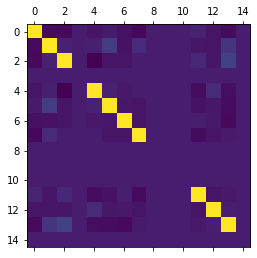

In [29]:
second_order = pred_spikes.NOrderInteractions(N=2)
print(np.shape(second_order))
plt.matshow(second_order[0])
plt.show()

Test

[[-2.48689958e-17 -1.59872116e-17 -5.24025268e-17  0.00000000e+00
   0.00000000e+00 -3.10862447e-17  1.24344979e-17 -1.95399252e-17
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.77635684e-17
  -3.19744231e-17  6.75015599e-17  0.00000000e+00]]
[[1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0.]]
(1, 15, 1000)


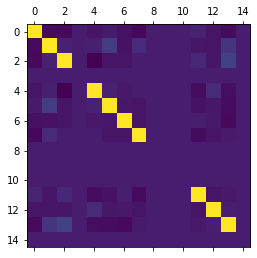

In [19]:
scaled_spikes = hdnet.spikes.Spikes(pred_spikes.scale_and_center())
print(np.mean(scaled_spikes._spikes,axis=2))
print(np.std(scaled_spikes._spikes,axis=2))
print(np.shape(scaled_spikes._spikes))
plt.matshow(scaled_spikes.covariance()[0])

### Third Order

(1, 15, 15, 15)


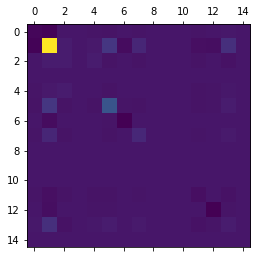

In [28]:
third_order = pred_spikes.NOrderInteractions(N=3)
print(np.shape(third_order))
plt.matshow(third_order[0][1])
plt.show()

# Validation Examples

## 1. Plot Log Probability Ratios of codewords in ```true_spikes``` and ```pred_spikes``` against frequencies in ```true_spikes```

In [55]:
NEURONS = 15
NUM_SAMPLES = 10**4

In [56]:
true_spikes = hdnet.spikes.Spikes(spikes=hdnet.sampling.sample_from_ising_gibbs(J=Js[0,:NEURONS,:NEURONS], theta=thetas[0,:NEURONS], 
num_samples = NUM_SAMPLES, burn_in = 5*10**2, sampling_steps = 10**2))
pred_spikes = hdnet.spikes.Spikes(spikes=hdnet.sampling.sample_from_ising_gibbs(J=Js[2,:NEURONS,:NEURONS], theta=thetas[2,:NEURONS], 
num_samples = NUM_SAMPLES, burn_in = 5*10**2, sampling_steps = 10**2))

In [57]:
freqs_true = true_spikes.get_frequencies()
logp = hdnet.spikes_model_validation.LogProbabilityRatio(
    true_spikes,pred_spikes)
ratios = logp.call()

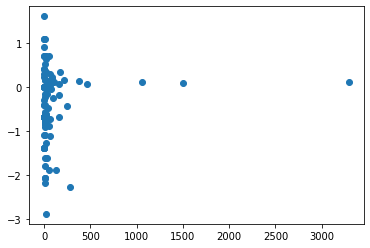

In [58]:
x = []
y = []
for code,ratio in ratios.items():
    x.append(ratio)
    y.append(freqs_true[code])

plt.scatter(y,x)
plt.show()

## 2. Compare intersection of most frequently occurring codewords in ```true_spikes``` and ```pred_spikes```

In [59]:
freqc = hdnet.spikes_model_validation.MostFrequentCommonCode(
    true_spikes,pred_spikes)
print("Common Codes: "+str(len(freqc.call(500)))+" in Top 500 Codes")

Common Codes: 101 in Top 500 Codes


## 3. Plot C<sub>ij</sub> for neurons  in ```true_spikes``` and ```pred_spikes```

In [63]:
true_second_order = true_spikes.NOrderInteractions(N=2)[0]
pred_second_order = pred_spikes.NOrderInteractions(N=2)[0]

In [65]:
x = []
y = []

for i in range(NEURONS):
    for j in range(i+1,NEURONS):
        x.append(true_second_order[i][j])
        y.append(pred_second_order[i][j])

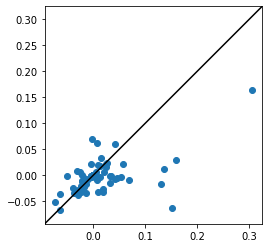

In [72]:
fig, ax = plt.subplots()
ax.scatter(x, y)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]), 
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()